<a href="https://colab.research.google.com/github/kAi3345/Dark-Matter/blob/main/orbital_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt


 $v_{ob} = \sqrt{\frac{GM_\odot}{r}}$




In [45]:
from google.colab import files

In [46]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (1).txt


In [47]:
import astropy.io.ascii


In [34]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")
tab

col1,col2,col3,col4
float64,float64,float64,float64
25.0,5.68,235.5,17.8
30.0,6.81,242.9,0.8
35.0,7.95,251.1,0.7
40.0,9.08,262.0,2.1
45.0,10.22,258.9,6.9
50.0,11.35,255.1,5.7
55.0,12.49,251.8,17.1
60.0,13.62,252.1,7.4
65.0,14.76,251.0,18.6


Text(0, 0.5, 'velocity [km/s]')

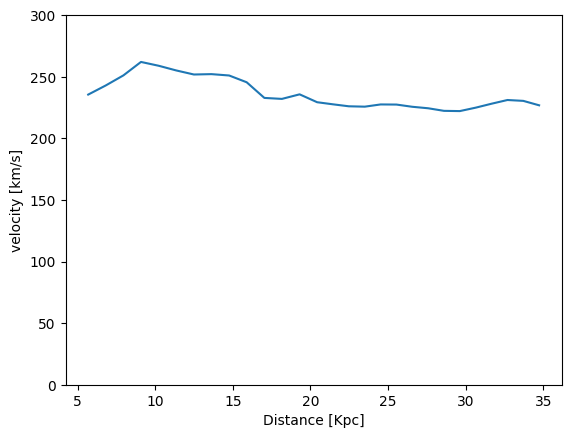

In [48]:
dis = tab['col2']
vel = tab['col3']
plt.plot(dis,vel)
plt.ylim(0,300)
plt.xlabel("Distance [Kpc]")
plt.ylabel("velocity [km/s]")

In [62]:
def cal_orbital_velocity(mass, radius):
  vel = (np.sqrt(ac.G * mass)/radius)
  return(vel.si)

In [68]:
mass = 1 * u.earthMass

radius = 1 * u.earthRad

orb_vel = cal_orbital_velocity(mass,radius)

print(orb_vel)

3.130239309329155 m(1/2) / s


In [65]:
mass = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
c = cal_orbital_velocity(mass,radius)

print(c)


3.6001248612395456e-07 m(1/2) / s


In [60]:
vel = np.zeros(np.shape(dis)) * u.km / u.s

In [61]:
for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec
  orb_vel = cal_orbital_velocity(mass,rad)
  vel[i] = orb_vel
  #print(i,radius,orb_vel.to(u.km/u.s))


UnitConversionError: ignored

In [2]:
ac.G.si


<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [3]:
v_Orbital = np.sqrt(ac.G * u.solMass / u.au)
print(v_Orbital.si, v_Orbital.to(u.km/u.s))

29784.691829676933 m / s 29.784691829676934 km / s


In [4]:
v = np.sqrt(ac.G * u.earthMass / u.earthRad)
print(v.to(u.km / u.s))

7.905388234385281 km / s


In [5]:
r = ac.G * u.solMass / ac.c**2

print(r.to(u.km))

1.476625038050125 km
